# BERT base neuralmind, soma dos score do par.

## Conceptnet-hypernym-1
- (1,1) é um par onde hipônimo e hiperônimo são de tamanho 1
- O tamanho do par (1,1) será 2, assim como o tamanho do par (2,1) e (1,2) será 3

> Suponha o par (3,2) (abacate, fruta)
> Temos as seguintes sentenças:
- [MASK] ca te é um tipo de fru ta
- aba [MASK] te é um tipo de fru ta
- aba ca [MASK] é um tipo de fru ta
- aba ca te é um tipo de [MASK] ta
- aba ca te é um tipo de fru [MASK]

> Mascarando a palavra e pegando o score dela. O score pra esse par será a soma de todos os valores recuperados.


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
plt.clf()
# data
dict_values = {'hiponimo': [], 'hiperonimo':[], 'classe':[], 'fonte':[], 'pattern': [], 'soma_hipo':[], 'soma_hiper':[], 'len_hipo':[], 'len_hiper':[]}
f_in = open("../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-1.json")
json_data = json.load(f_in)
for data, values in json_data.items():
    hipo, hiper, classe, fonte = data.strip().split()
    for pattern, score in values.items():
        dict_values['hiponimo'].append(hipo)
        dict_values['hiperonimo'].append(hiper)
        dict_values['classe'].append(classe)
        dict_values['fonte'].append(fonte)
        dict_values['pattern'].append(pattern)
        soma = sum(score[0])
        dict_values['soma_hipo'].append(soma)
        soma = sum(score[1])
        dict_values['soma_hiper'].append(soma)
        dict_values['len_hipo'].append(len(score[0]))
        dict_values['len_hiper'].append(len(score[1]))

df = pd.DataFrame(dict_values)
del dict_values
df['soma_total'] = df['soma_hipo'] + df['soma_hiper']
df['len_total'] = df['len_hipo'] + df['len_hiper']
pattern_unique = df['pattern'].unique().tolist()
len_total_unique = df['len_total'].unique().tolist()


df_rate = df[df['pattern'] == pattern_unique[0]][['hiponimo', 'hiperonimo', 'classe', 'fonte', 'len_total']]
df_rate = df_rate.groupby(['len_total'])['classe'].value_counts()
dict_values = {'len_total': [], 'true':[], 'false':[], 'ratio':[]}
for v in len_total_unique:
    dict_values['len_total'].append(v)
    if "True" in df_rate[v]:
        dict_values['true'].append(df_rate[v]['True'])
    else:
        dict_values['true'].append(0)
    if "False" in df_rate[v]:
        dict_values['false'].append(df_rate[v]['False'])
    else:
        dict_values['false'].append(0)

    dict_values['ratio'].append(dict_values['true'][-1] / (dict_values['true'][-1] + dict_values['false'][-1]))
df_taxa = pd.DataFrame(dict_values)
del dict_values

<Figure size 432x288 with 0 Axes>

### Razão entra True/False
- eixo X = tamanho do subtokem do par
- eixo Y = porcentagem dos pares True

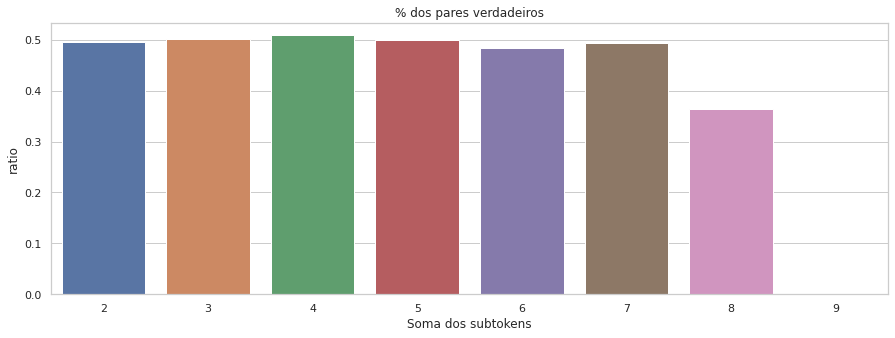

In [2]:
# figure
plt.figure(figsize=(15,5))
ax = sns.barplot(x='len_total', y='ratio', data=df_taxa)
ax.set(xlabel="Soma dos subtokens")
ax.set_title(f"% dos pares verdadeiros")
plt.show()


### Soma dos subtokens por padrão
- eixo X = tamanho do subtoken do par
- eixo Y = Soma dos subtokens do par

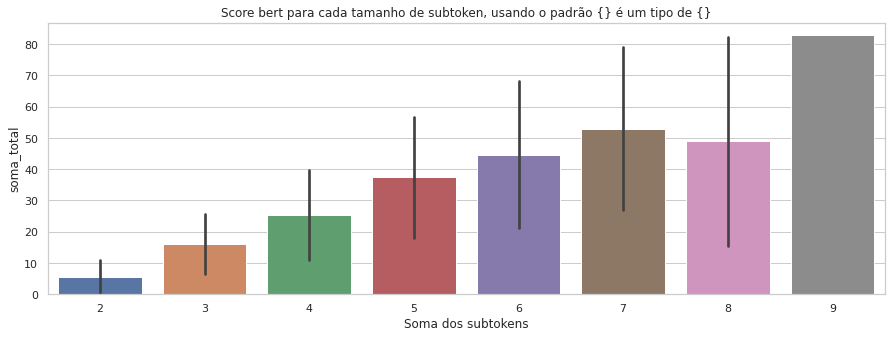

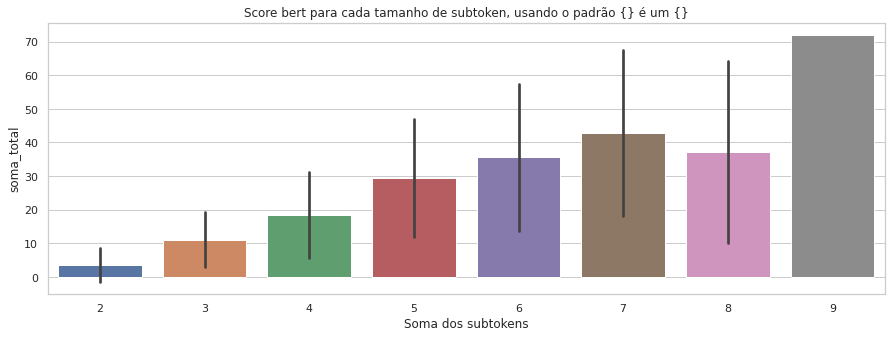

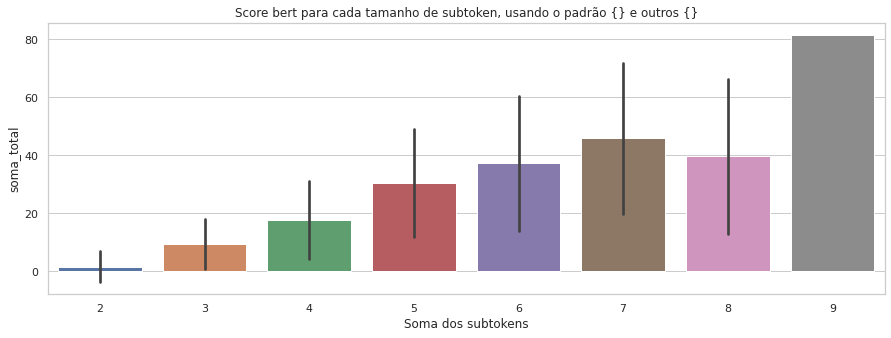

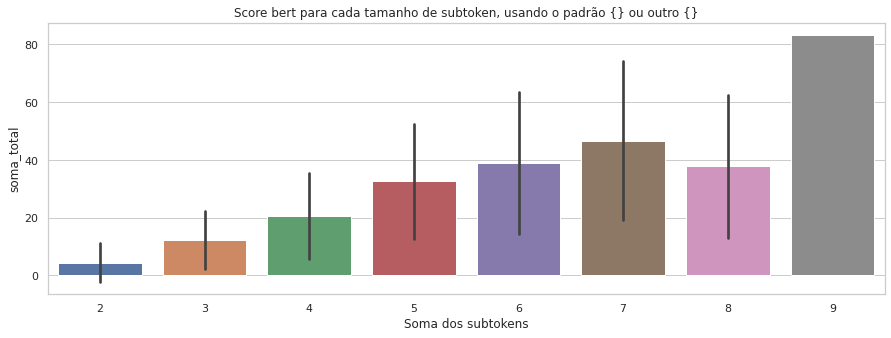

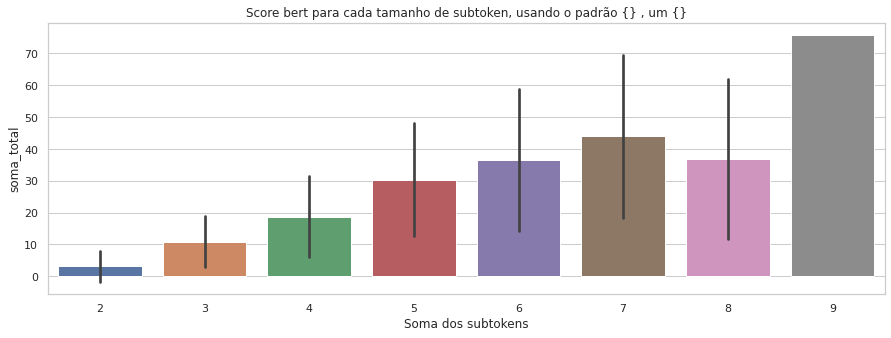

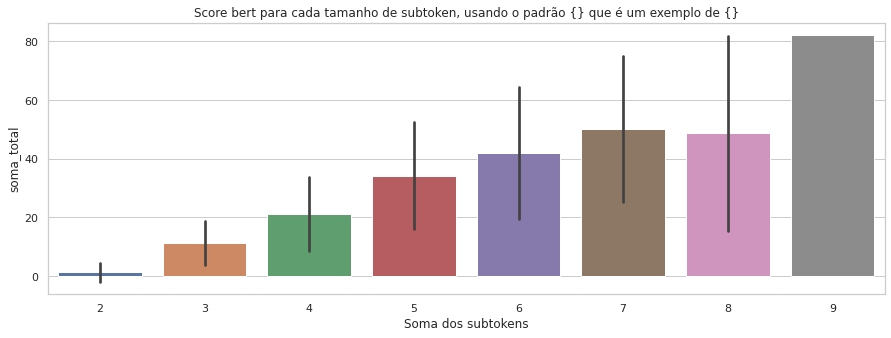

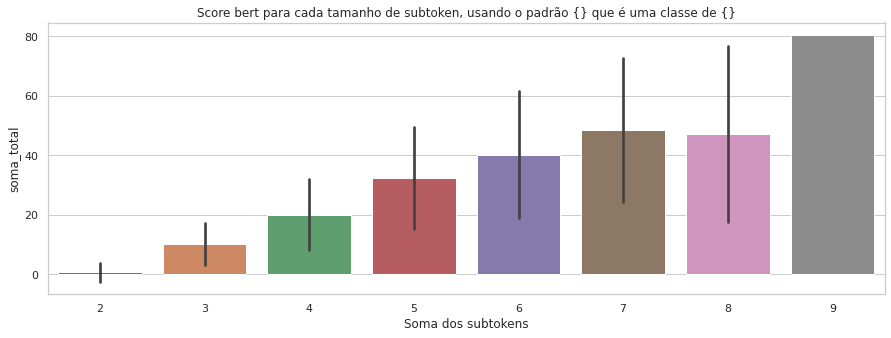

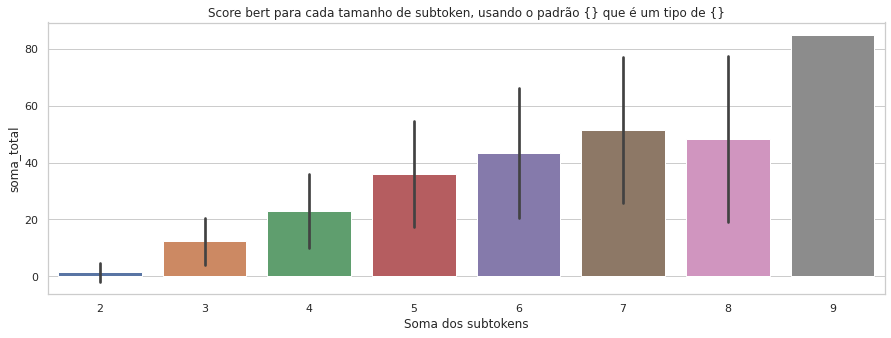

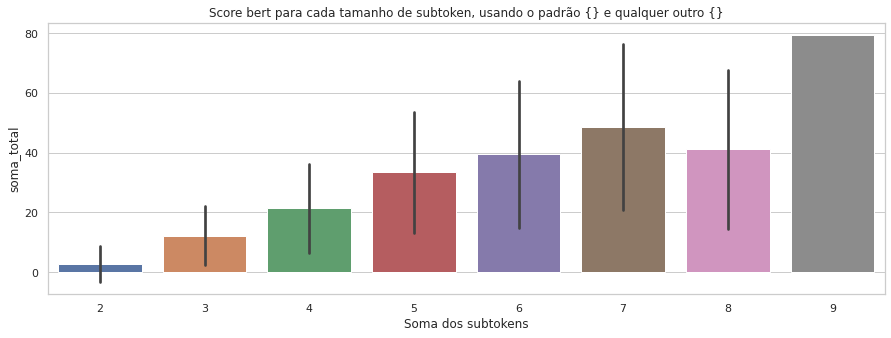

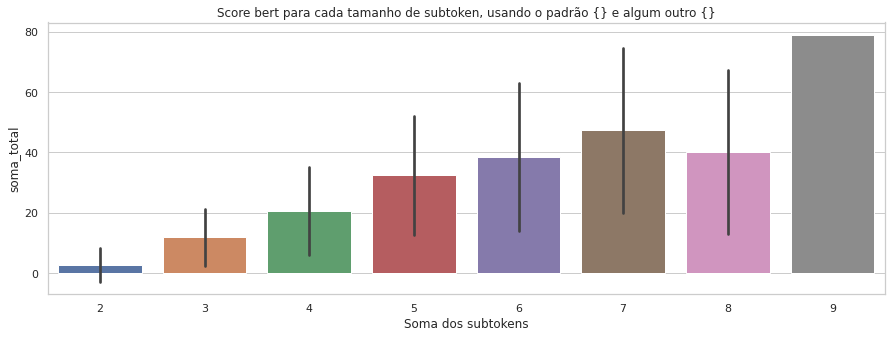

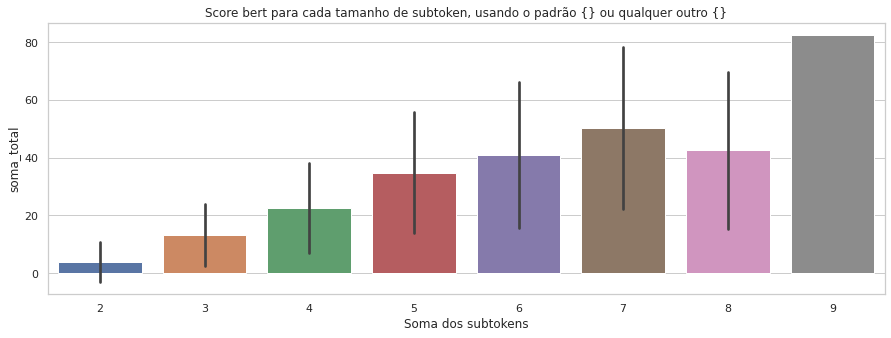

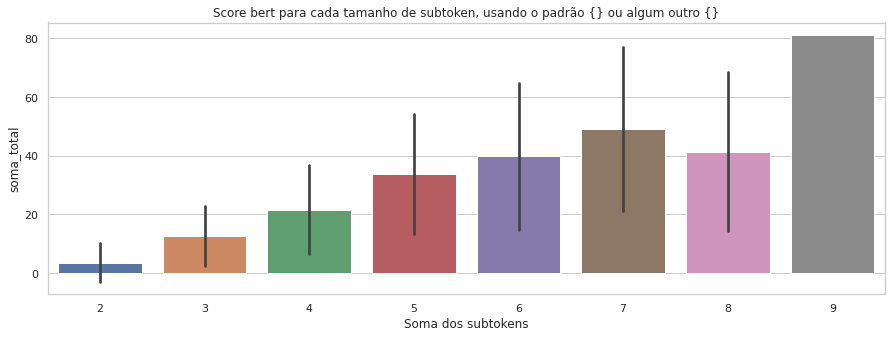

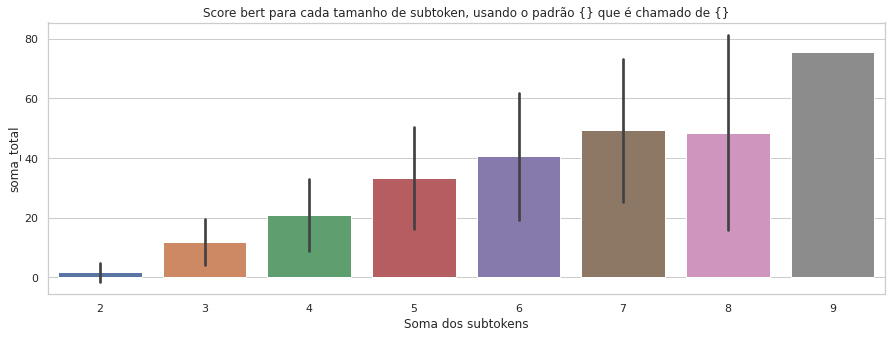

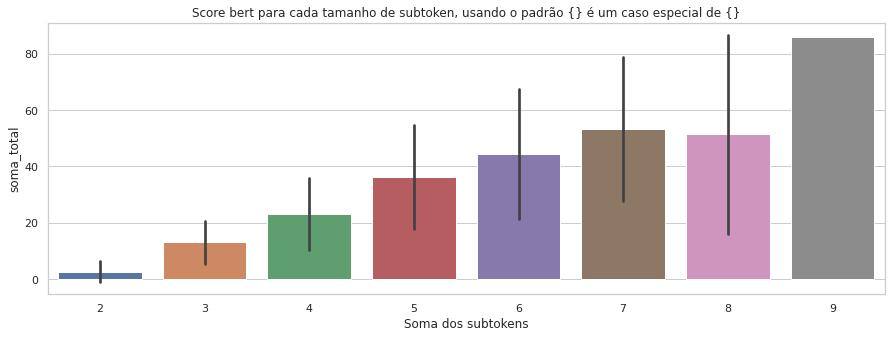

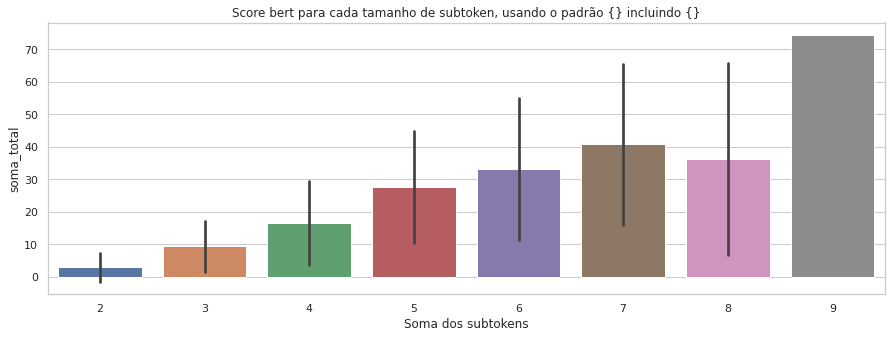

In [3]:
# figure
for p in pattern_unique:
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='len_total', y='soma_total', ci='sd', data=df[df['pattern'] == p ])
    ax.set(xlabel="Soma dos subtokens")
    ax.set_title(f"Score bert para cada tamanho de subtoken, usando o padrão {p}")
    plt.show()

______________________________________________________________________________________
# BERT base neuralmind, soma dos score do par

## Conceptnet-hypernym-all-relations
- (1,1) é um par onde hipônimo e hiperônimo são de tamanho 1
- O tamanho do par (1,1) será 2, assim como o tamanho do par (2,1) e (1,2) será 3


In [4]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
plt.clf()
# data
dict_values = {'hiponimo': [], 'hiperonimo':[], 'classe':[], 'fonte':[], 'pattern': [], 'soma_hipo':[], 'soma_hiper':[], 'len_hipo':[], 'len_hiper':[]}
f_in = open("../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-allrelation.json")
json_data = json.load(f_in)
for data, values in json_data.items():
    hipo, hiper, classe, fonte = data.strip().split()
    for pattern, score in values.items():
        dict_values['hiponimo'].append(hipo)
        dict_values['hiperonimo'].append(hiper)
        dict_values['classe'].append(classe)
        dict_values['fonte'].append(fonte)
        dict_values['pattern'].append(pattern)
        soma = sum(score[0])
        dict_values['soma_hipo'].append(soma)
        soma = sum(score[1])
        dict_values['soma_hiper'].append(soma)
        dict_values['len_hipo'].append(len(score[0]))
        dict_values['len_hiper'].append(len(score[1]))

df = pd.DataFrame(dict_values)
del dict_values
df['soma_total'] = df['soma_hipo'] + df['soma_hiper']
df['len_total'] = df['len_hipo'] + df['len_hiper']
pattern_unique = df['pattern'].unique().tolist()
len_total_unique = df['len_total'].unique().tolist()


df_rate = df[df['pattern'] == pattern_unique[0]][['hiponimo', 'hiperonimo', 'classe', 'fonte', 'len_total']]
df_rate = df_rate.groupby(['len_total'])['classe'].value_counts()
dict_values = {'len_total': [], 'true':[], 'false':[], 'ratio':[]}
for v in len_total_unique:
    dict_values['len_total'].append(v)
    if "True" in df_rate[v]:
        dict_values['true'].append(df_rate[v]['True'])
    else:
        dict_values['true'].append(0)
    if "False" in df_rate[v]:
        dict_values['false'].append(df_rate[v]['False'])
    else:
        dict_values['false'].append(0)

    dict_values['ratio'].append(dict_values['true'][-1] / (dict_values['true'][-1] + dict_values['false'][-1]))
df_taxa = pd.DataFrame(dict_values)
del dict_values

<Figure size 432x288 with 0 Axes>


### Razão entra True/False
- eixo X = tamanho do subtoken do par
- eixo Y = porcentagem dos pares True

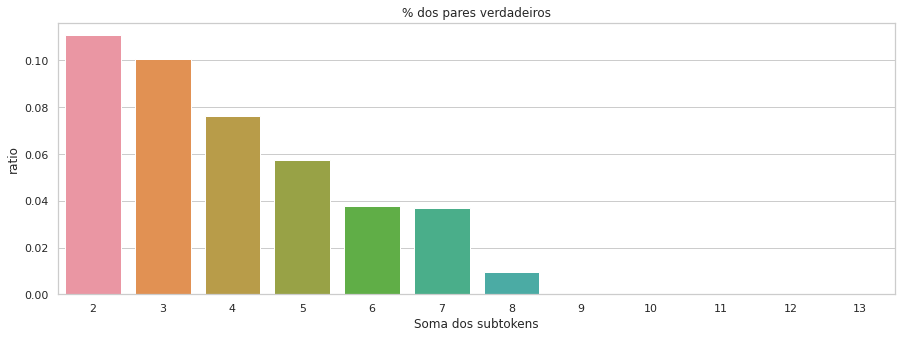

In [5]:
# figure
plt.figure(figsize=(15,5))
ax = sns.barplot(x='len_total', y='ratio', data=df_taxa)
ax.set(xlabel="Soma dos subtokens")
ax.set_title(f"% dos pares verdadeiros")
plt.show()

### Soma dos subtokens por padrão
- eixo X = tamanho do subtoken do par
- eixo Y = Soma dos subtokens do par

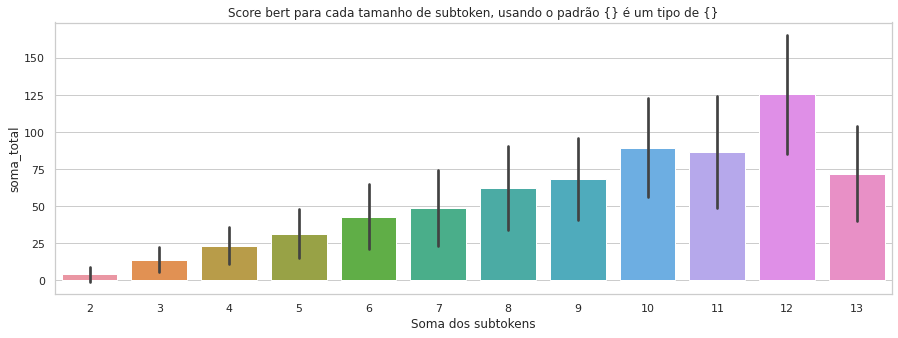

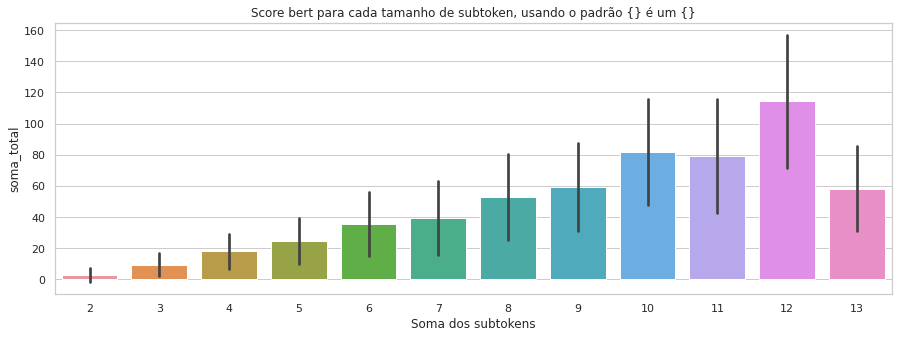

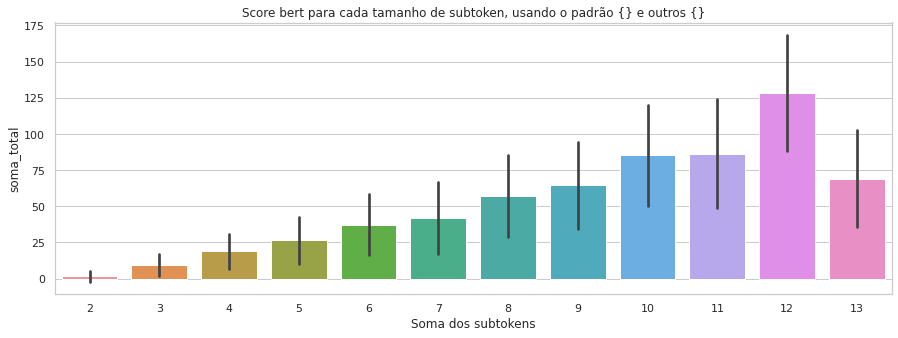

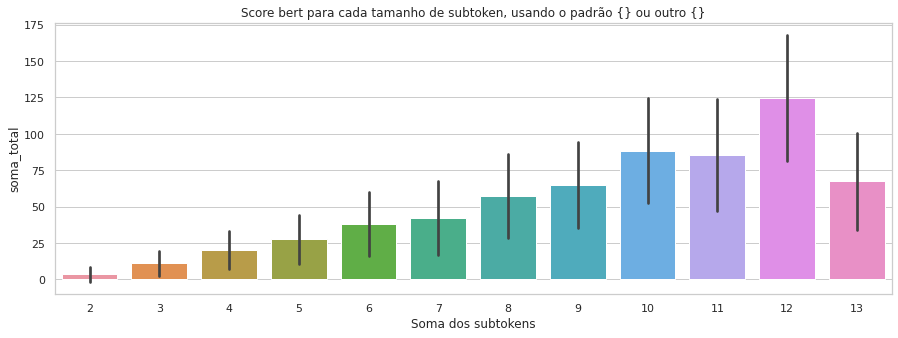

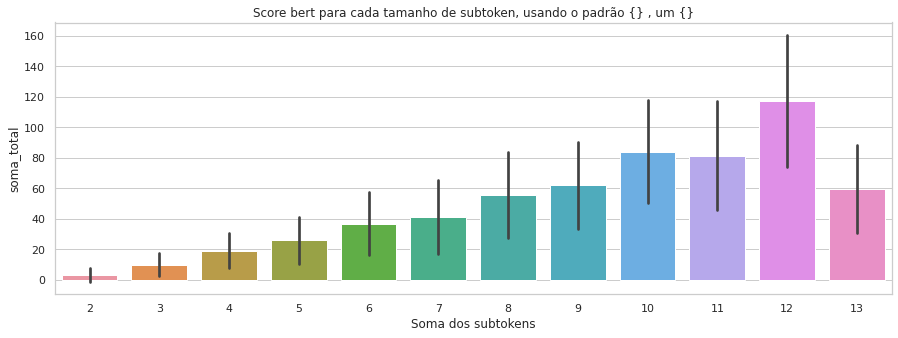

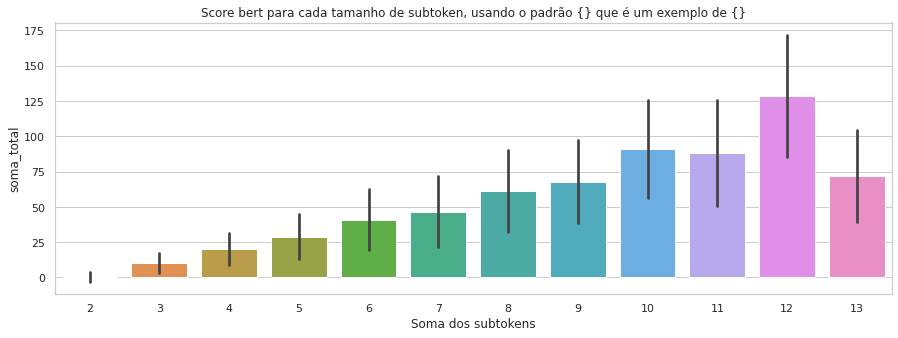

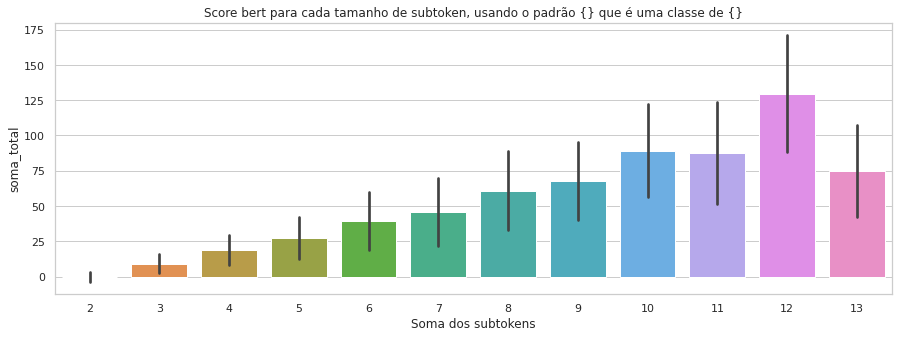

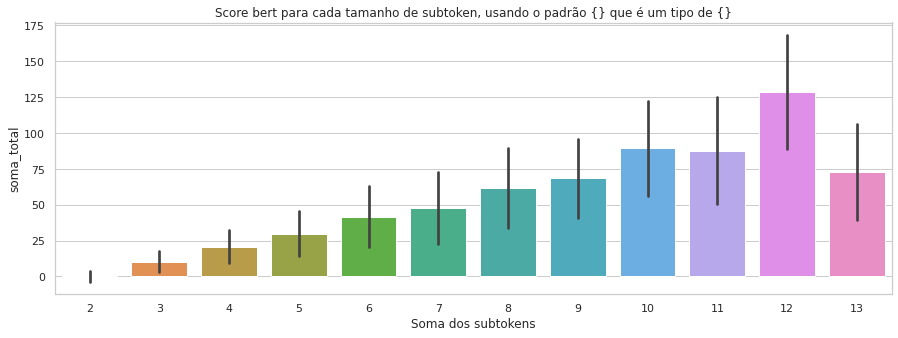

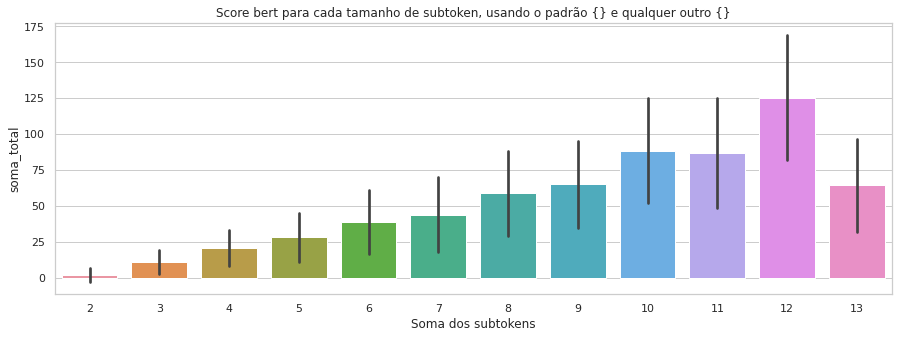

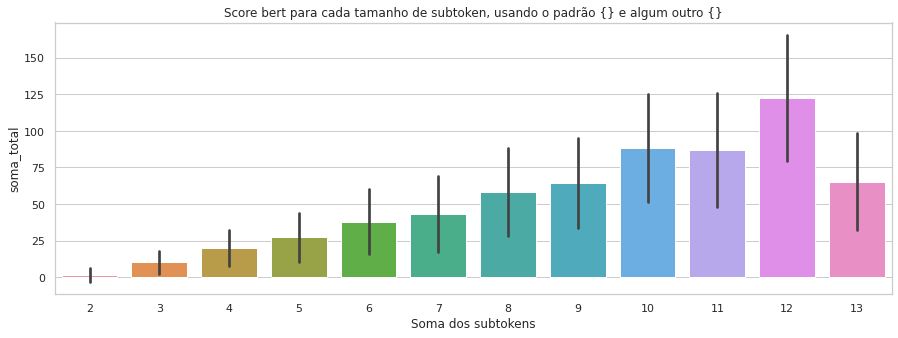

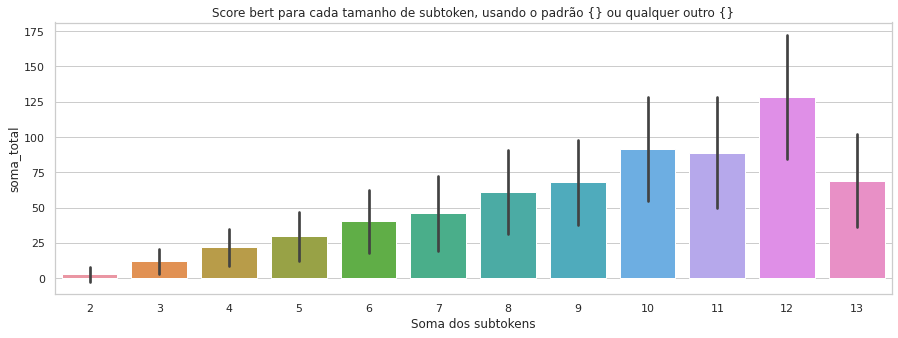

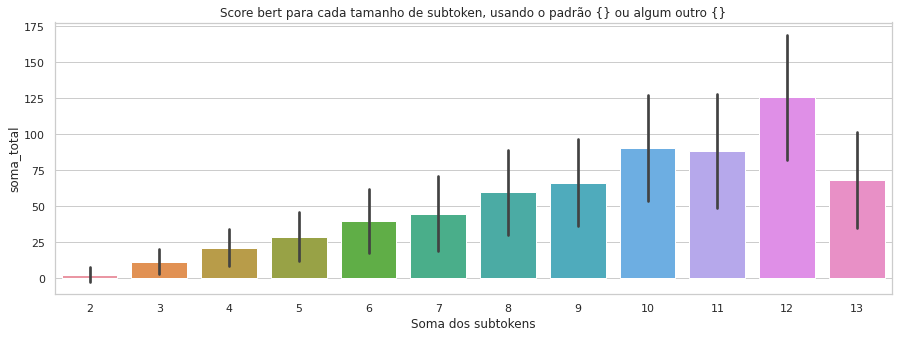

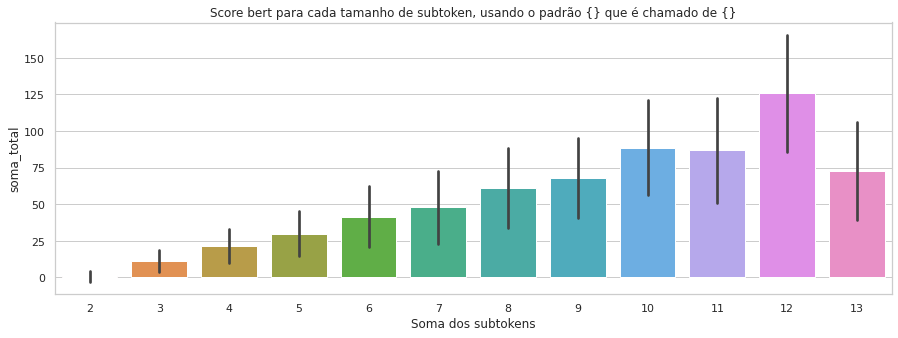

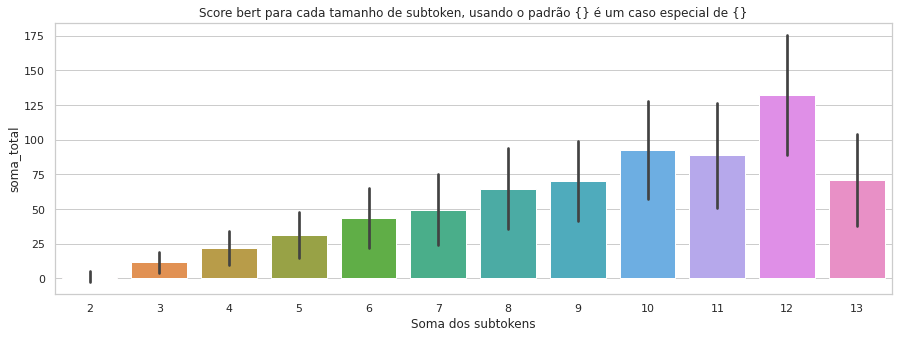

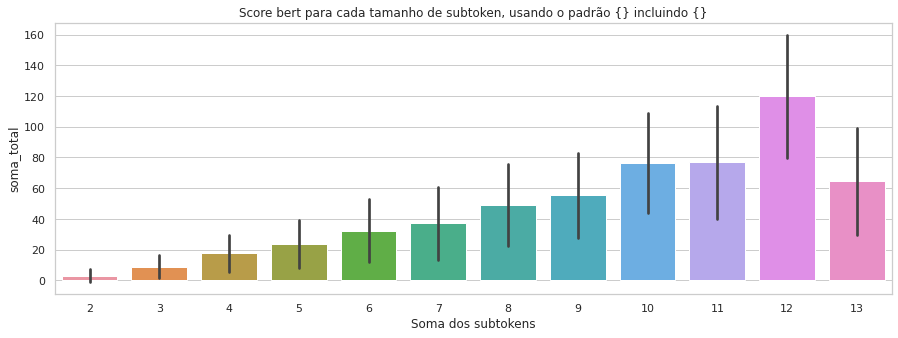

In [6]:
# figure
for p in pattern_unique:
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x='len_total', y='soma_total', ci='sd', data=df[df['pattern'] == p ])
    ax.set(xlabel="Soma dos subtokens")
    ax.set_title(f"Score bert para cada tamanho de subtoken, usando o padrão {p}")
    plt.show()
